<a href="https://colab.research.google.com/github/ziraax/StockPricePredictionRNN-LSTM/blob/main/StockPricePredLSTM_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction du prix d'une action avec les modeles LSTM et RNN**

## **Project Overview**

La prédiction des prix des actions joue un rôle crucial dans les marchés financiers, et des prévisions précises peuvent avoir des implications significatives pour les entreprises, les investisseurs et les institutions financières.

La prédiction des prix des actions aide les investisseurs et les gestionnaires de fonds à prendre des décisions d'investissement éclairées. En prévoyant avec précision les prix futurs des actions, les investisseurs peuvent identifier des opportunités potentielles pour maximiser les profits ou minimiser les pertes. Cela leur permet de répartir judicieusement leur capital et d'ajuster leurs portefeuilles d'investissement en fonction des mouvements de prix prévus.

Les techniques d'apprentissage automatique (Machine Learning) et d'apprentissage profond (Deep Learning) ont démontré leur potentiel pour améliorer la précision des prédictions des prix des actions et aider les investisseurs, les traders et les analystes financiers à prendre des décisions éclairées. En utilisant les techniques de ML, les entreprises peuvent obtenir des informations précieuses, optimiser leurs stratégies d'investissement et améliorer la gestion des risques dans le domaine complexe et dynamique du marché boursier.

La prédiction des prix des actions est une tâche difficile en raison de la complexité inhérente et de la volatilité des marchés financiers. Les méthodes traditionnelles échouent souvent à capturer les motifs complexes et les dépendances présents dans les données des prix des actions. Cependant, les modèles RNN et LSTM ont montré un grand potentiel pour capturer les dépendances temporelles et faire des prédictions précises dans diverses tâches de prévision de séries chronologiques.


Tout au long de ce projet, nous examinerons les fondamentaux des RNN et des LSTM et explorerons leur adéquation pour capturer les dépendances temporelles dans les données de prix des actions. Nous apprendrons comment prétraiter et préparer le jeu de données historiques des prix des actions pour l'entraînement et le test de nos modèles.

## **Objectifs d'apprentissage**

* Revoir les bases des réseaux neuronaux pour comprendre leur structure et leur fonctionnalité.

* Apprendre à charger et prétraiter les données de séries temporelles pour les prix des actions, en assurant la qualité et la cohérence des données.

* Formuler la prédiction des prix des actions comme un problème de prévision de séries temporelles, en considérant l'ordre temporel des données et en les divisant en ensembles d'entraînement et de test.

* Apprendre les principes et l'architecture des réseaux neuronaux récurrents (RNN).

* Comprendre comment les RNN traitent les données séquentielles et capturent les dépendances temporelles.

* Évaluer les métriques de performance des modèles.

* Explorer les réseaux de mémoire à long court terme (LSTM), un type spécialisé de RNN. Comprendre les avantages des LSTM pour capturer les dépendances à long terme et atténuer le problème du gradient qui disparaît.

* Apprendre à intégrer des caractéristiques ou des facteurs supplémentaires pouvant influencer les prix des actions, tels que l'indice de force relative (RSI) et la moyenne mobile exponentielle (EMA), et formuler un problème d'entrée multivariée pour améliorer la précision des prévisions.

* Comprendre les défis et les limites inhérents à la prédiction des prix des actions, y compris la volatilité du marché, les événements imprévus et la présence de bruit dans les marchés financiers.

## **Approche**

* Bases des réseaux neuronaux :
    * Revoir les bases des réseaux neuronaux pour comprendre leur structure et leur fonctionnalité.
    * Construire et entraîner des réseaux neuronaux avec Keras sur un jeu de données d'exemple.

* Chargement des données de séries temporelles :
    * Obtenir les données de séries temporelles pour les prix des actions à partir de Yahoo Finance.

* Transformations des données :
    * Effectuer une mise à l'échelle des caractéristiques ou une normalisation pour amener les données dans une plage cohérente.
    * Créer des fenêtres chevauchantes pour l'entraînement.

* Réseaux neuronaux récurrents (RNN) :
    * Construction et entraînement du modèle.
    * Génération de séquences et évaluation.

* LSTM :
    * Construction et entraînement du modèle.
    * Génération de séquences et évaluation.

* Entrée multivariée et LSTM :
    * Création d'indicateurs techniques.
    * Création d'étiquettes.
    * Effectuer une mise à l'échelle des caractéristiques ou une normalisation pour amener les données dans une plage cohérente.
    * Construction et entraînement du modèle.
    * Évaluation.

## **Installation des librairies**

In [1]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install tensorflow
!pip install statsmodels
!pip install numpy
!pip install scikit-learn
!pip install seaborn
!pip install matplotlib
!pip install pandas
!pip install yfinance
!pip install pandas_datareader
!pip install pandas_ta
!pip install Keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=dbfcfed7ba15462cfc1a48e5d81cb2c751f512521cd483347358b43fe64a7860
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [4]:
from datetime import datetime
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import yfinance as yf
from sklearn.metrics import *
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr
import pandas_ta as ta
from keras.layers import LSTM, SimpleRNN
from keras.models import Sequential
from keras.layers import Dense

In [5]:
keras.backend.set_image_data_format("channels_last")
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
yf.pdr_override()
%matplotlib inline

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


## **Time Series Data**

In [15]:
dataset = pdr.get_data_yahoo('MSFT', start='2012-01-01', end=datetime.now())

[*********************100%%**********************]  1 of 1 completed


In [16]:
dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.200518,64731500
2012-01-04,26.820000,27.469999,26.780001,27.400000,21.699442,80516100
2012-01-05,27.379999,27.730000,27.290001,27.680000,21.921188,56081400
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.261724,99455500
2012-01-09,28.049999,28.100000,27.719999,27.740000,21.968702,59706800


In [17]:
# Start and end of training dataset
tstart = 2016
tend = 2020

In [18]:
def train_test_plot(dataset, tstart, tend):
    dataset.loc[f"{tstart}":f"{tend}", "High"].plot(figsize=(24, 8), legend=True)
    dataset.loc[f"{tend+1}":, "High"].plot(figsize=(16, 4), legend=True)
    plt.legend([f"Train (Before {tend+1})", f"Test ({tend+1} and beyond)"])
    plt.title("Microsoft stock price")
    plt.show()

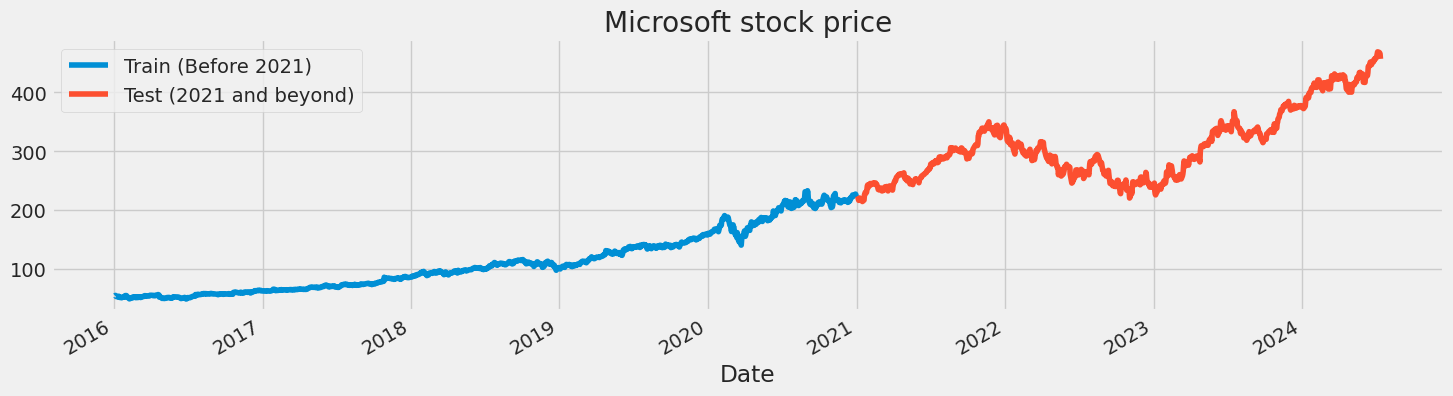

In [19]:
train_test_plot(dataset, tstart, tend)

### Creation des datasets train et test ###

In [20]:
def train_test_split(dataset, tstart, tend, columns = ['High']):
    train = dataset.loc[f"{tstart}":f"{tend}", columns].values
    test = dataset.loc[f"{tend+1}":, columns].values
    return train, test

In [21]:
training_set, test_set = train_test_split(dataset, tstart, tend)

### Scaling des valeurs avec MinMaxScaler

In [22]:
sc = MinMaxScaler(feature_range=(0, 1))
training_set = training_set.reshape(-1, 1)
training_set_scaled = sc.fit_transform(training_set)

### Creation des "overlapping window batches"

In [23]:
n_steps = 1
features = 1

def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [24]:
X_train, y_train = split_sequence(training_set_scaled, n_steps)

In [25]:
# Reshaping X_train for model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], features)

### Evaluation

In [26]:
def plot_predictions(test, predicted, title):
    plt.plot(test, color="gray", label="Real")
    plt.plot(predicted, color="red", label="Predicted")
    plt.title(f'{title}')
    plt.xlabel("Time")
    plt.ylabel(f'{title}')
    plt.legend()
    plt.show()

In [27]:
def return_rmse(test, predicted):
    rmse = np.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {:.2f}.".format(rmse))

## **Recurrent Neural Networks**

### Vanilla RNN

In [28]:
def plot_loss(history):
    plt.figure(figsize = (15,10))
    plt.plot(history.history['loss'], label='loss')
    plt.legend(loc='best')
    plt.show()

In [29]:
model_rnn = Sequential()
model_rnn.add(SimpleRNN(units=125, input_shape=(n_steps, features)))
model_rnn.add(Dense(units=1))

In [30]:
# Compiling the model
model_rnn.compile(optimizer="RMSprop", loss="mse")

In [31]:
history = model_rnn.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

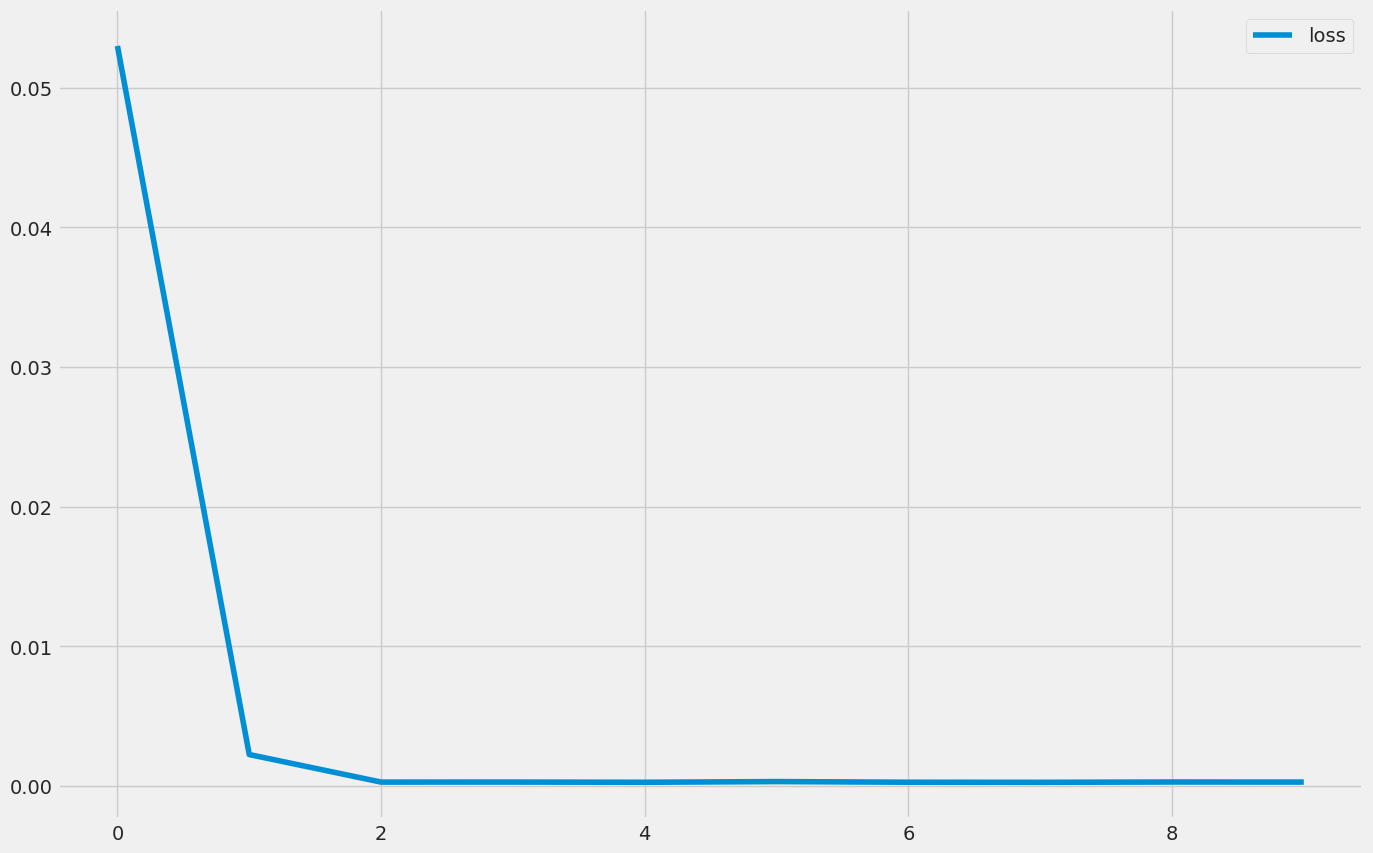

In [32]:
plot_loss(history)

## **Time Series Prediction**

In [33]:
# Scaling
inputs = sc.transform(test_set.reshape(-1, 1))

In [34]:
# Split into samples
X_test, y_test = split_sequence(inputs, n_steps)
# reshape
X_test = X_test.reshape(-1, n_steps, features)

In [35]:
# Prediction
predicted_stock_price = model_rnn.predict(X_test)
# Inverse transform the values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

28/28 [==============================] - 0s 2ms/step


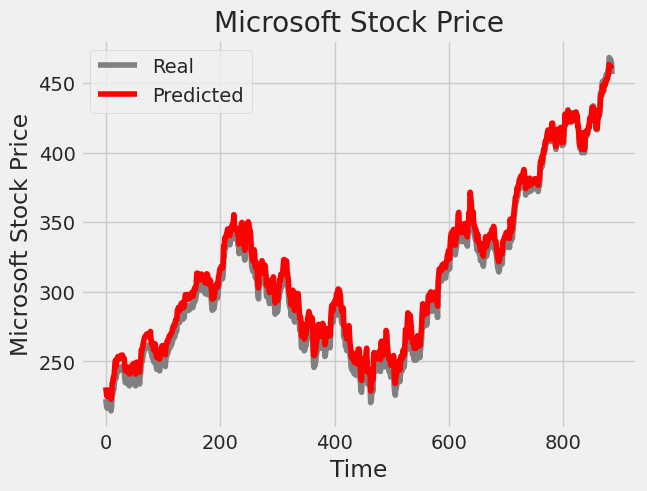

In [36]:
plot_predictions(test_set, predicted_stock_price, "Microsoft Stock Price")

### Sequence Generation

In [52]:
steps_in_future = 50

def sequence_generation(dataset: pd.DataFrame, sc: MinMaxScaler, model:Sequential, steps_future: int):
    high_dataset = dataset.iloc[len(dataset) - len(test_set) - n_steps:]["High"]
    high_dataset = sc.transform(high_dataset.values.reshape(-1, 1))
    inputs = high_dataset[:n_steps]

    for _ in range(steps_future):
        curr_pred = model.predict(inputs[-n_steps:].reshape(-1, n_steps, features), verbose=0)
        inputs = np.append(inputs, curr_pred, axis=0)

    return sc.inverse_transform(inputs[n_steps:])

In [38]:
results = sequence_generation(dataset, sc, model_rnn, steps_in_future)

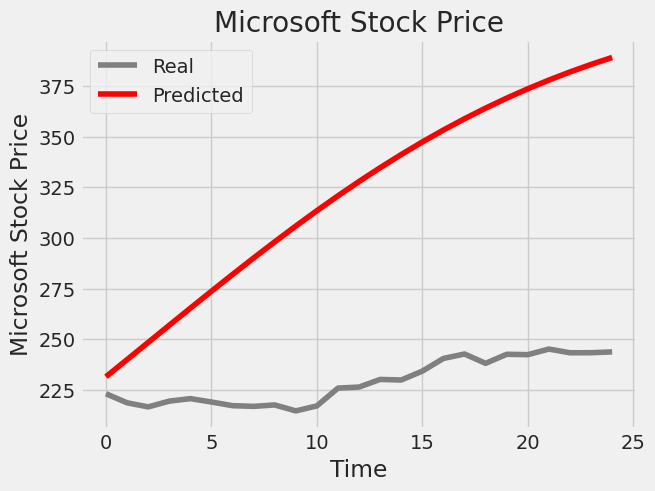

In [40]:
plot_predictions(test_set[:steps_in_future], results, "Microsoft Stock Price")

## **LSTM**

In [41]:
model_lstm = Sequential()
model_lstm.add(LSTM(units=125, input_shape=(n_steps, features)))
model_lstm.add(Dense(units=1))

In [42]:
# Compiling the model
model_lstm.compile(optimizer="RMSprop", loss="mse")

In [43]:
history = model_lstm.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

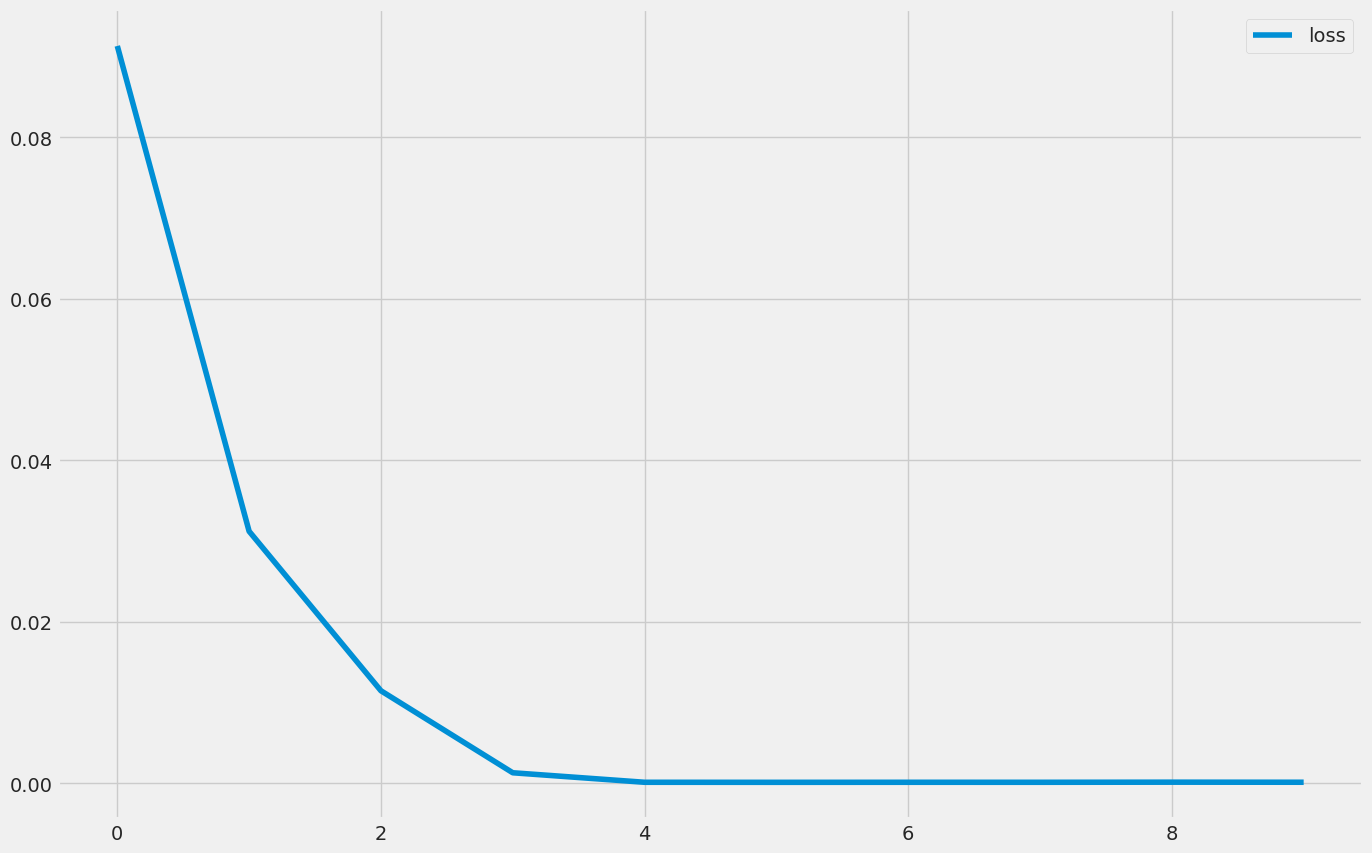

In [44]:
plot_loss(history)

In [45]:
#prediction
predicted_stock_price = model_lstm.predict(X_test)
#inverse transform the values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

28/28 [==============================] - 0s 2ms/step


### Time Series Prediction: LSTM

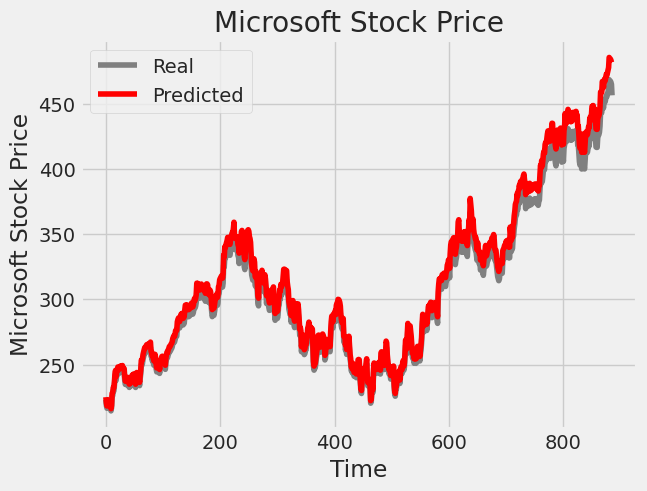

In [47]:
plot_predictions(test_set, predicted_stock_price, "Microsoft Stock Price")

### Sequence Generation: LSTM

In [48]:
results = sequence_generation(dataset, sc, model_lstm, steps_in_future)

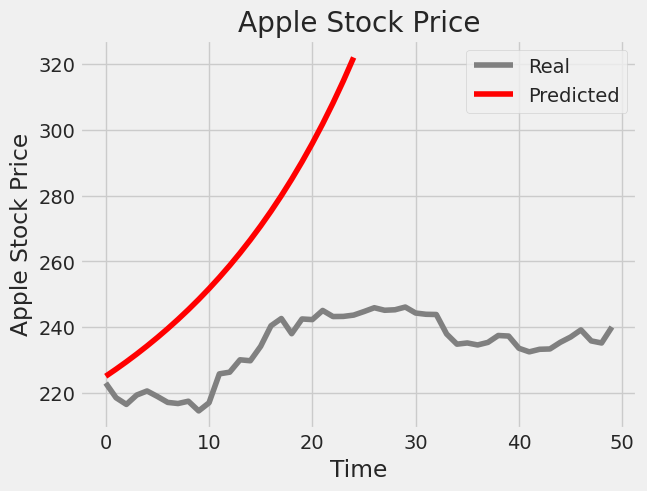

In [53]:
plot_predictions(test_set[:steps_in_future], results, "Apple Stock Price")

## Multivariate Input

In [54]:
mv_features = 6

In [55]:
multi_variate_df = dataset.copy()

multi_variate_df['RSI'] = ta.rsi(multi_variate_df.Close, length=15)
multi_variate_df['EMAF'] = ta.ema(multi_variate_df.Close, length=20)
multi_variate_df['EMAM'] = ta.ema(multi_variate_df.Close, length=100)
multi_variate_df['EMAS'] = ta.ema(multi_variate_df.Close, length=150)


### Creating Labels

In [56]:
multi_variate_df['Target'] = multi_variate_df['Adj Close'] - dataset.Open
multi_variate_df['Target'] = multi_variate_df['Target'].shift(-1)
multi_variate_df.dropna(inplace=True)
multi_variate_df.drop(['Volume', 'Close'], axis=1, inplace=True)

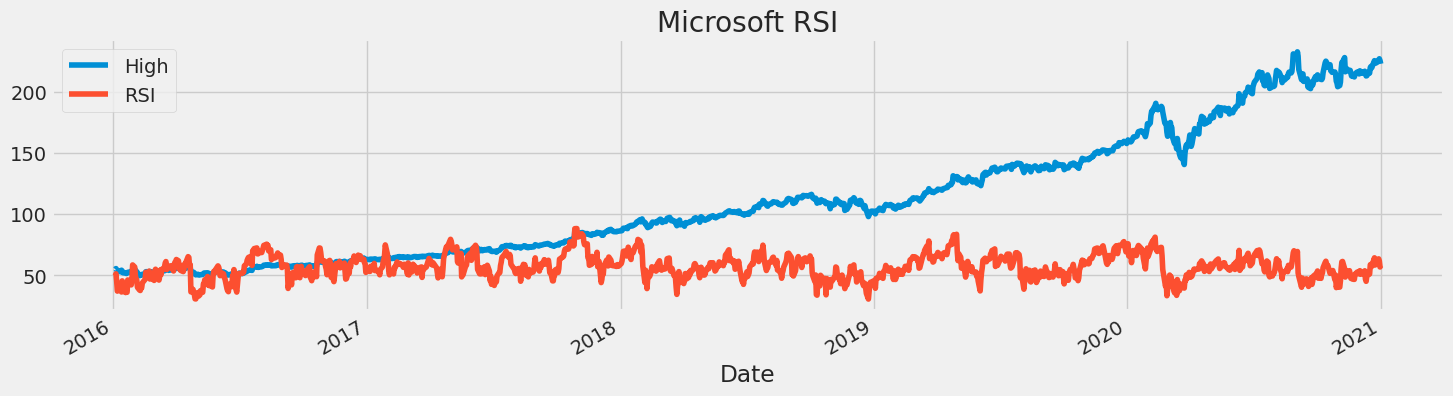

In [58]:
multi_variate_df.loc[f"{tstart}":f"{tend}", ['High', 'RSI']].plot(figsize=(16, 4), legend=True)
plt.title("Microsoft RSI")
plt.show()

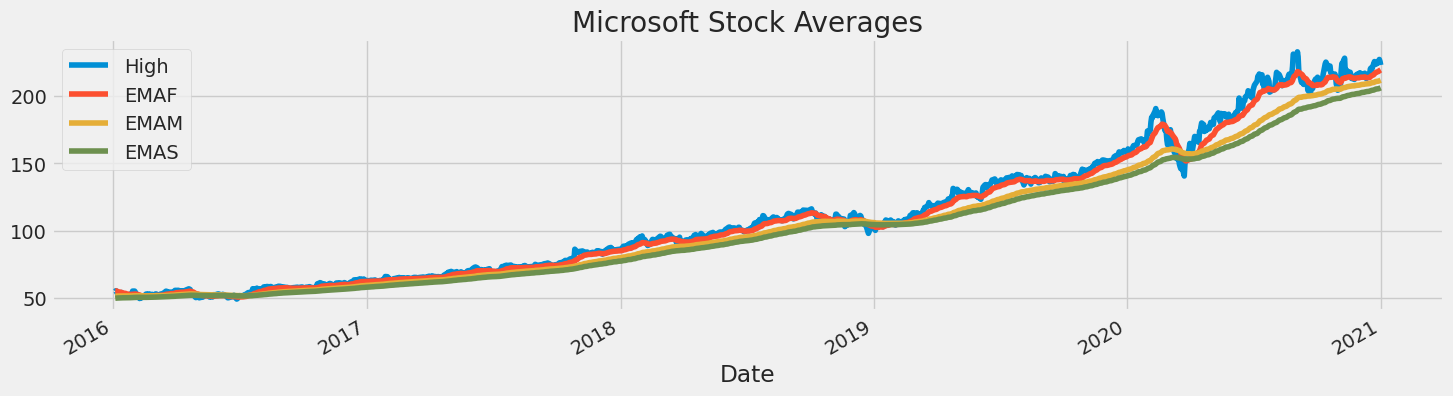

In [59]:
multi_variate_df.loc[f"{tstart}":f"{tend}", ['High', 'EMAF', 'EMAM', 'EMAS']].plot(figsize=(16, 4), legend=True)
plt.title("Microsoft Stock Averages")
plt.show()

In [60]:
feat_columns = ['Open', 'High', 'RSI', 'EMAF', 'EMAM', 'EMAS']
label_col = ['Target']

### Splitting train and test data

In [61]:
mv_training_set, mv_test_set = train_test_split(multi_variate_df, tstart, tend, feat_columns + label_col)

In [62]:
X_train = mv_training_set[:, :-1]
y_train = mv_training_set[:, -1]

X_test = mv_test_set[:, :-1]
y_test = mv_test_set[:, -1]

### Scaling Data

In [63]:
mv_sc = MinMaxScaler(feature_range=(0, 1))
X_train = mv_sc.fit_transform(X_train).reshape(-1, 1, mv_features)
X_test = mv_sc.transform(X_test).reshape(-1, 1, mv_features)

### Model

In [64]:
model_mv = Sequential()
model_mv.add(LSTM(units=125, input_shape=(1, mv_features)))
model_mv.add(Dense(units=1))
# Compiling the model
model_mv.compile(optimizer="RMSprop", loss="mse")

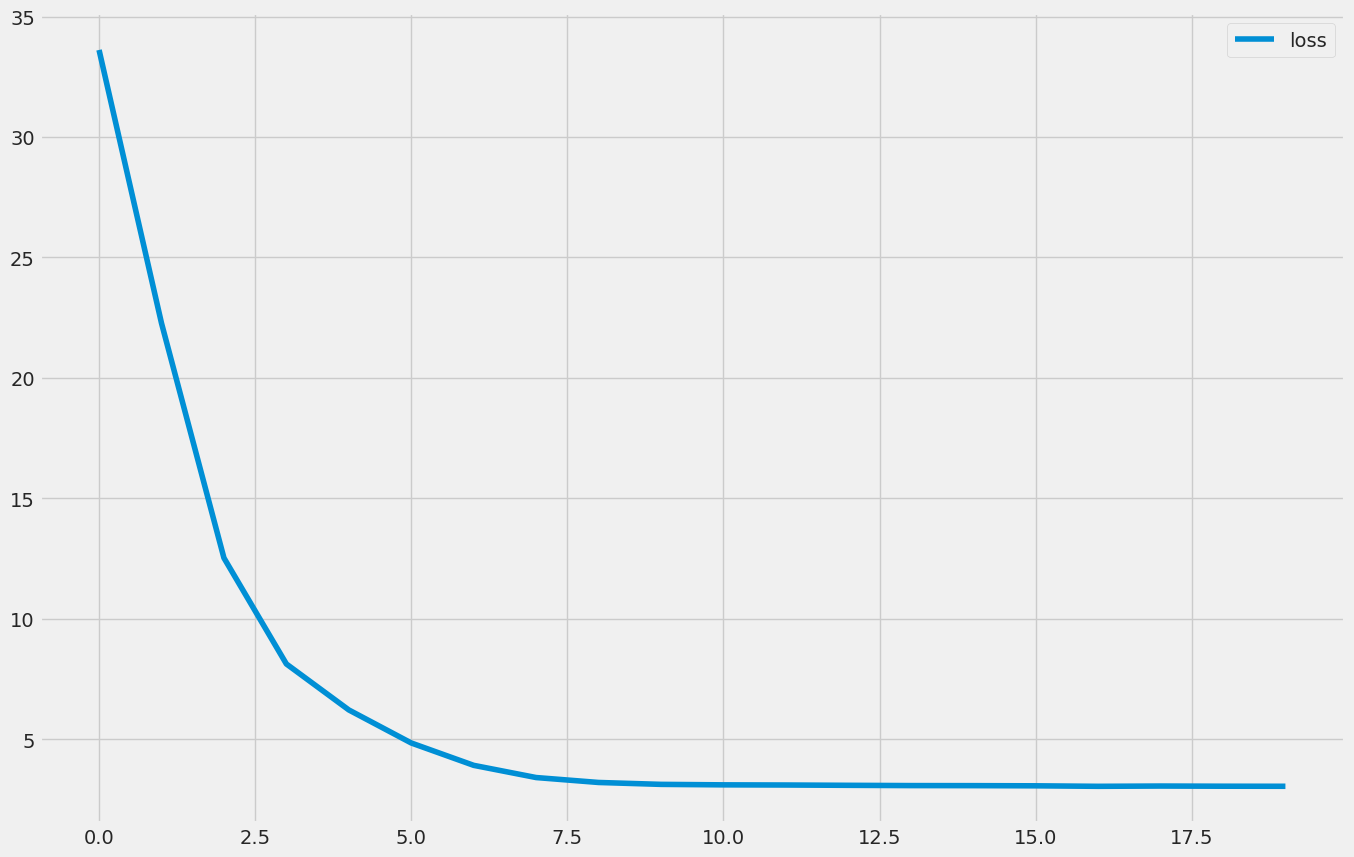

In [65]:
history = model_mv.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)
plot_loss(history)

### Results

28/28 [==============================] - 1s 3ms/step


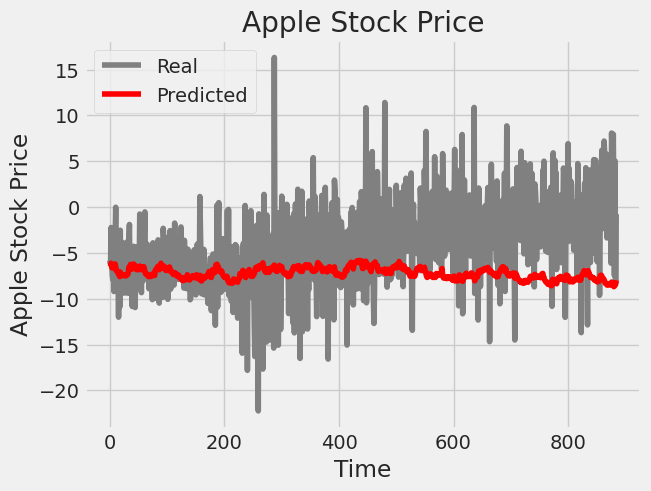

In [66]:
predictions = model_mv.predict(X_test)
plot_predictions(y_test, predictions, "Apple Stock Price")